# SMOTE-based Techniques for SVM
This transcript outlines the process of balancing a machine learning dataset for quasar classification using a constructed and provided combined features file to obtain benchmark results.

Here, we experimented with the Support Vector Machine classifier (SVM), implementing different types of SMOTE-based algorithms that are commonly used today to address class imbalance by augmenting the minority class, improving model performance on imbalanced datasets. We adopted the following 
                    
                    1) VSVMSMOTE; 2) BorderLineSMOte; 3) SMOTEENN; and 4) ADASYN 

The steps involved: 
1. Merging and preprocessing the combined features file, including handling missing and infinite values.
2. Encoding the target labels and scaling the features.
3. Using the algorithm to address class imbalance by oversampling minority classes and undersampling noisy majority classes.
4. Splitting the balanced data into training and testing sets.
5. Training the SVM on the balanced dataset and evaluating its performance using classification metrics and confusion matrix visualization.

# Step 1: Importing necessary libraries 
First, we install and import necessary packages and libraries 

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Step 2: Load and Merge Datasets
After installing and importing all the necessary packages, we extracted the data for this project consisting of two separate files: gr_features_by_object.csv and new_features.csv. These datasets are then merged into a single Data Frame based on the name column. After merging, rows are filtered to retain only the relevant classes (Q, QR, QX), which represent the target labels for classification.

In [111]:
original_features = pd.read_csv('/Users/nanditadas/Desktop/Sem_3/Astroinfo/Project_Github/gr_features_by_object.csv')
new_features = pd.read_csv('/Users/nanditadas/Desktop/Sem_3/Astroinfo/Project_Github/new_features.csv')

features = original_features.merge(new_features, on='name', how='inner')
del original_features, new_features

features = features[features['type'].isin(['Q', 'QR', 'QX'])]

# Step 3: Checking and Handling Missing Values
To ensure data quality, missing values are identified and addressed. The script first calculates the number of missing values for each column. Rows with missing values in critical columns (f_var_r, f_var_g, mhps_high_r, mhps_ratio_r) are dropped to maintain data integrity. Remaining columns are also checked to ensure no missing values persist.

In [114]:
features.dropna(subset=["f_var_r", "f_var_g", "mhps_high_r", "mhps_ratio_r"], inplace=True)

# Step 4: Encode Target Labels
The target variable (type) is categorical and needs to be converted into numerical format for model compatibility. The LabelEncoder is used to map each class (Q, QR, QX) to a unique integer value.

In [117]:
X = features.drop(columns=['type', 'name'])
y = features['type']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Step 5: Standardizing and Imputing Features
Feature values are standardized using StandardScaler to normalize them to a common scale, which is crucial for algorithms like SVM. Missing values in the features are replaced with the column-wise mean using SimpleImputer.

In [120]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


After the pre-processing, we integrated 4 SMOTE techniques in the following ways to handle imbalanced data and optimize the SVM model. It Includes all plots, confusion matrices, and benchmark metrics:

# (I) SVMSMOTE

In [126]:
# Apply SVMSMOTE
svmsmote = SVMSMOTE(random_state=42)
X_resampled, y_resampled = svmsmote.fit_resample(X_scaled, y_encoded)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [128]:
# Check the class distribution
print("Original class distribution:", Counter(y_encoded))
print("Resampled class distribution:", Counter(y_resampled))

Original class distribution: Counter({0: 18722, 2: 2373, 1: 1224})
Resampled class distribution: Counter({2: 18722, 0: 18722, 1: 10847})


In [130]:
# Split Data into Training and Testing Sets

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

In [132]:
# Train the SVM Classifier

svc = SVC(kernel="rbf", class_weight="balanced", random_state=42)
svc.fit(X_train, y_train)

SVC(class_weight='balanced', random_state=42)


Classification Report:
              precision    recall  f1-score   support

           Q       0.77      0.80      0.78      3745
          QR       0.72      0.89      0.79      2169
          QX       0.91      0.74      0.82      3745

    accuracy                           0.80      9659
   macro avg       0.80      0.81      0.80      9659
weighted avg       0.81      0.80      0.80      9659



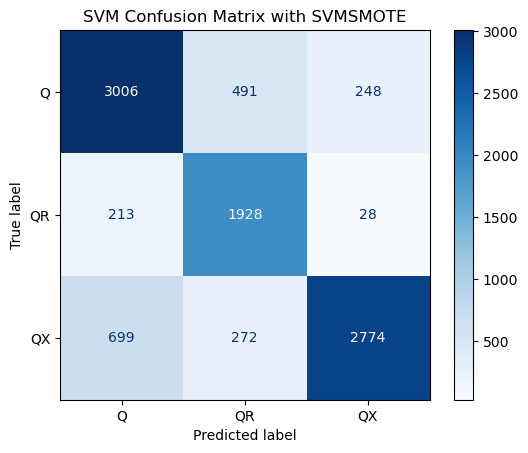

In [134]:
# Evaluate the Model

y_pred = svc.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_).plot(cmap=plt.cm.Blues)
plt.title("SVM Confusion Matrix with SVMSMOTE")
plt.show()

# (II) SMOTEENN

In [139]:
# Apply SMOTEENN
smoteenn = SMOTEENN(random_state=42)
X_resampled_smoteenn, y_resampled_smoteenn = smoteenn.fit_resample(X_resampled, y_resampled)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [141]:
# Split the resampled data
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled_smoteenn, y_resampled_smoteenn, test_size=0.2, stratify=y_resampled_smoteenn, random_state=42
)

In [143]:
# Train SVM
svc = SVC(kernel="rbf", class_weight="balanced", random_state=42)
svc.fit(X_train, y_train)

SVC(class_weight='balanced', random_state=42)


Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.88      0.75      1061
           1       0.89      0.94      0.92      3667
           2       0.96      0.81      0.88      3589

    accuracy                           0.88      8317
   macro avg       0.84      0.88      0.85      8317
weighted avg       0.89      0.88      0.88      8317



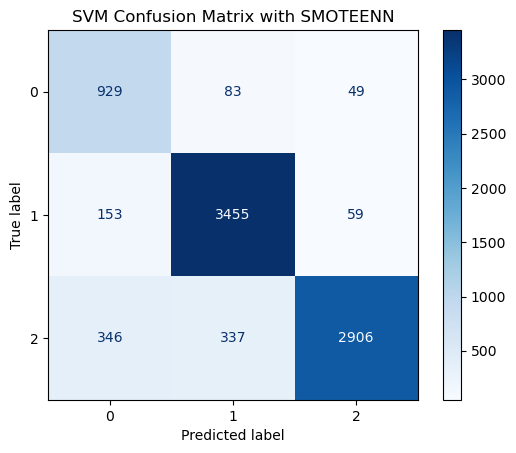

In [144]:
# Evaluate the model
y_pred = svc.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap=plt.cm.Blues)
plt.title("SVM Confusion Matrix with SMOTEENN")
plt.show()

# (III) BorderlineSMOTE

In [150]:
# Apply BorderlineSMOTE
borderline_smote = BorderlineSMOTE(random_state=42, kind='borderline-1')  # You can use 'borderline-1' or 'borderline-2'
X_resampled_borderline, y_resampled_borderline = borderline_smote.fit_resample(X_scaled, y_encoded)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [152]:
# Check class distribution after BorderlineSMOTE
print("Original class distribution:", Counter(y_encoded))
print("Resampled class distribution with BorderlineSMOTE:", Counter(y_resampled_borderline))

Original class distribution: Counter({0: 18722, 2: 2373, 1: 1224})
Resampled class distribution with BorderlineSMOTE: Counter({2: 18722, 0: 18722, 1: 18722})


In [154]:
# Split the resampled data
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled_borderline, y_resampled_borderline, test_size=0.2, stratify=y_resampled_borderline, random_state=42
)
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (44932, 115)
Test set size: (11234, 115)


In [158]:
# Train SVM on resampled data
svc = SVC(kernel="rbf", class_weight="balanced", random_state=42)
svc.fit(X_train, y_train)

SVC(class_weight='balanced', random_state=42)

In [159]:
# Predict and evaluate
y_pred = svc.predict(X_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78      3744
           1       0.86      0.91      0.88      3745
           2       0.83      0.82      0.82      3745

    accuracy                           0.83     11234
   macro avg       0.83      0.83      0.83     11234
weighted avg       0.83      0.83      0.83     11234



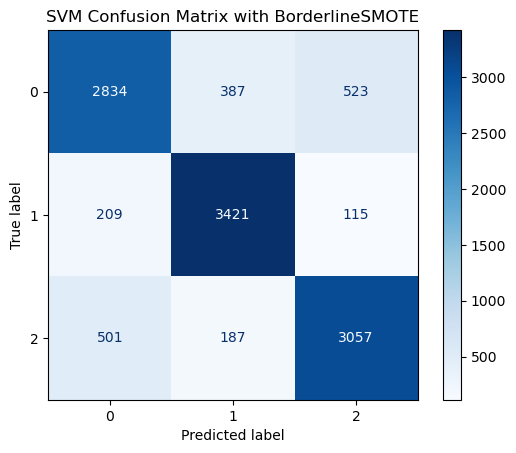

In [162]:
# Evaluate performance

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap=plt.cm.Blues)
plt.title("SVM Confusion Matrix with BorderlineSMOTE")
plt.show()

# (IV) ADASYN

In [167]:
adasyn = ADASYN(random_state=42)
X_resampled_adasyn, y_resampled_adasyn = adasyn.fit_resample(X_scaled, y_encoded)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [169]:
# Display class distributions before and after ADASYN
print("Original class distribution:", Counter(y_encoded))
print("Resampled class distribution with ADASYN:", Counter(y_resampled_adasyn))

Original class distribution: Counter({0: 18722, 2: 2373, 1: 1224})
Resampled class distribution with ADASYN: Counter({0: 18722, 2: 18548, 1: 18426})


In [171]:
# Step 6: Split the Resampled Data
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled_adasyn, y_resampled_adasyn, test_size=0.2, stratify=y_resampled_adasyn, random_state=42
)
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (44556, 115)
Test set size: (11140, 115)


In [184]:
# Step 7: Train and Evaluate SVM Classifier
svc = SVC(kernel="rbf", class_weight="balanced", random_state=42)
svc.fit(X_train, y_train)

SVC(class_weight='balanced', random_state=42)


Classification Report:
              precision    recall  f1-score   support

           Q       0.80      0.70      0.74      3745
          QR       0.81      0.90      0.85      3685
          QX       0.79      0.80      0.79      3710

    accuracy                           0.80     11140
   macro avg       0.80      0.80      0.79     11140
weighted avg       0.80      0.80      0.79     11140



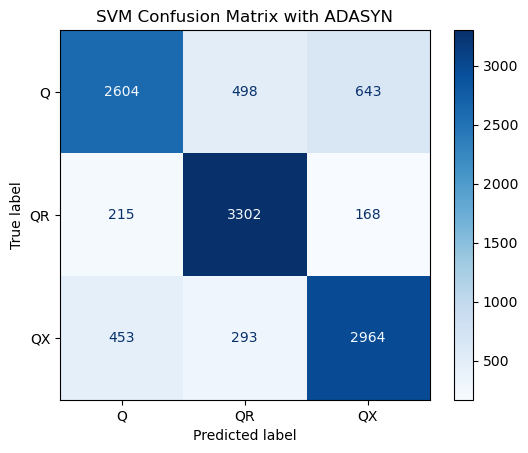

In [175]:
# Evaluate the Performance
y_pred = svc.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_).plot(cmap=plt.cm.Blues)
plt.title("SVM Confusion Matrix with ADASYN")
plt.savefig("svm_adasyn_confusion_matrix.png", dpi=300, bbox_inches="tight")
plt.show()